# Linear Model

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)
N_SAMPLES = 1000

x1 = np.random.multivariate_normal(
    mean=[0, 0], 
    cov=[[1, .75],[.75, 1]], 
    size=N_SAMPLES,
)
x2 = np.random.multivariate_normal(
    mean=[1, 4], 
    cov=[[1, .75],[.75, 1]], 
    size=N_SAMPLES,
)
synthetic_features = np.vstack((x1, x2))
synthetic_labels = np.hstack((np.zeros(N_SAMPLES), np.ones(N_SAMPLES)))

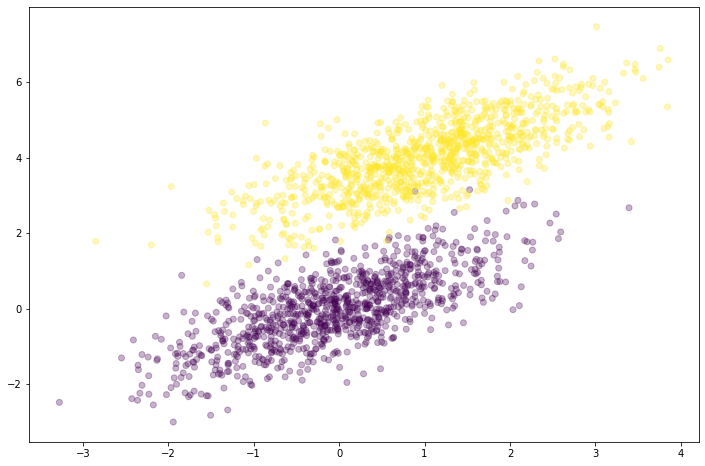

In [22]:
plt.figure(figsize=(12,8))
plt.scatter(
    x=synthetic_features[:, 0],
    y=synthetic_features[:, 1],
    c=synthetic_labels,
    alpha=.3
);

In [39]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    return np.sum(target * scores - np.log(1 + np.exp(scores)))

def logistic_regression(
    features, 
    target, 
    num_steps, 
    learning_rate,
    verbose=False,
):
    intercept = np.ones((features.shape[0], 1))
    features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        error = target - predictions
        gradient = np.dot(features.T, error)
        weights += learning_rate * gradient
        
        if (verbose) and (step % 50000 == 0):
            print(f"Step {str(step).zfill(6)} - Log Likelihood: {round(log_likelihood(features, target, weights), 2)}")
        
    return weights

In [43]:
weights = logistic_regression(
    synthetic_features, 
    synthetic_labels, 
    num_steps=500001, 
    learning_rate=1e-5, 
    verbose=True)

Step 000000 - Log Likelihood: -1344.13
Step 050000 - Log Likelihood: -43.11
Step 100000 - Log Likelihood: -37.62
Step 150000 - Log Likelihood: -35.63
Step 200000 - Log Likelihood: -34.63
Step 250000 - Log Likelihood: -34.05
Step 300000 - Log Likelihood: -33.68
Step 350000 - Log Likelihood: -33.43
Step 400000 - Log Likelihood: -33.26
Step 450000 - Log Likelihood: -33.13
Step 500000 - Log Likelihood: -33.04


In [44]:
weights

array([-12.18813957,  -4.17087095,   7.04377119])

In [74]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1e05)
clf.fit(synthetic_features, synthetic_labels)

print(clf.intercept_, clf.coef_[0])

[-13.58878142] [-4.64921074  7.83458593]


In [75]:
data_with_intercept = np.hstack((np.ones((synthetic_features.shape[0], 1)), synthetic_features))
final_scores = np.dot(data_with_intercept, weights)
preds = np.round(sigmoid(final_scores))

print('Accuracy from scratch: {0}'.format((preds==synthetic_labels).sum().astype(float) / len(preds)))
print('Accuracy from scikit-learn: {0}'.format(clf.score(synthetic_features, synthetic_labels)))

Accuracy from scratch: 0.9945
Accuracy from scikit-learn: 0.9945
